In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file_1 = ROOT.TFile.Open("run3B_NE_305stop.root")
hist_1 = ROOT.TH1D()
hcov_1 = ROOT.TH2D()
hist_1 = file_1.Get("calo_histogram_sum_ratio")
hcov_1 = file_1.Get("hcov")
file_2 = ROOT.TFile.Open("run3C_NE_305stop.root")
hist_2 = ROOT.TH1D()
hcov_2 = ROOT.TH2D()
hist_2 = file_2.Get("calo_histogram_sum_ratio")
hcov_2 = file_2.Get("hcov")
file_3 = ROOT.TFile.Open("run3D_NE_305stop.root")
hist_3 = ROOT.TH1D()
hcov_3 = ROOT.TH2D()
hist_3 = file_3.Get("calo_histogram_sum_ratio")
hcov_3 = file_3.Get("hcov")
file_4 = ROOT.TFile.Open("run3E_NE_305stop.root")
hist_4 = ROOT.TH1D()
hcov_4 = ROOT.TH2D()
hist_4 = file_4.Get("calo_histogram_sum_ratio")
hcov_4 = file_4.Get("hcov")
file_5 = ROOT.TFile.Open("run3F_NE_305stop.root")
hist_5 = ROOT.TH1D()
hcov_5 = ROOT.TH2D()
hist_5 = file_5.Get("calo_histogram_sum_ratio")
hcov_5 = file_5.Get("hcov")
file_6 = ROOT.TFile.Open("run3G_NE_305stop.root")
hist_6 = ROOT.TH1D()
hcov_6 = ROOT.TH2D()
hist_6 = file_6.Get("calo_histogram_sum_ratio")
hcov_6 = file_6.Get("hcov")
file_7 = ROOT.TFile.Open("run3I_NE_305stop.root")
hist_7 = ROOT.TH1D()
hcov_7 = ROOT.TH2D()
hist_7 = file_7.Get("calo_histogram_sum_ratio")
hcov_7 = file_7.Get("hcov")
file_8 = ROOT.TFile.Open("run3J_NE_305stop.root")
hist_8 = ROOT.TH1D()
hcov_8 = ROOT.TH2D()
hist_8 = file_8.Get("calo_histogram_sum_ratio")
hcov_8 = file_8.Get("hcov")
file_9 = ROOT.TFile.Open("run3K_NE_305stop.root")
hist_9 = ROOT.TH1D()
hcov_9 = ROOT.TH2D()
hist_9 = file_9.Get("calo_histogram_sum_ratio")
hcov_9 = file_9.Get("hcov")
file_10 = ROOT.TFile.Open("run3L_NE_305stop.root")
hist_10 = ROOT.TH1D()
hcov_10 = ROOT.TH2D()
hist_10 = file_10.Get("calo_histogram_sum_ratio")
hcov_10 = file_10.Get("hcov")
file_11 = ROOT.TFile.Open("run3M_NE_305stop.root")
hist_11 = ROOT.TH1D()
hcov_11 = ROOT.TH2D()
hist_11 = file_11.Get("calo_histogram_sum_ratio")
hcov_11 = file_11.Get("hcov")
file_12 = ROOT.TFile.Open("run3N_NE_305stop.root")
hist_12 = ROOT.TH1D()
hcov_12 = ROOT.TH2D()
hist_12 = file_12.Get("calo_histogram_sum_ratio")
hcov_12 = file_12.Get("hcov")
file_13 = ROOT.TFile.Open("run3O_NE_305stop.root")
hist_13 = ROOT.TH1D()
hcov_13 = ROOT.TH2D()
hist_13 = file_13.Get("calo_histogram_sum_ratio")
hcov_13 = file_13.Get("hcov")

In [3]:
fit_start=30000
fit_stop=305000
fit_range=hist_1.FindBin(fit_stop)-hist_1.FindBin(fit_start)+1
y_val=np.empty(shape=(13,fit_range))
y_err=np.empty(shape=(13,fit_range))
x_val=np.empty(shape=(13,fit_range))
y_cov=np.empty(shape=(13,fit_range,fit_range))  

In [4]:
%%time
for ibin in range (0,fit_range):
    y_val[0][ibin]=hist_1.GetBinContent(ibin+hist_1.FindBin(fit_start))
    y_err[0][ibin]=hist_1.GetBinError(ibin+hist_1.FindBin(fit_start))
    x_val[0][ibin]=hist_1.GetBinCenter(ibin+hist_1.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[0][irow][icol]=hcov_1.GetBinContent(irow+hist_1.FindBin(fit_start),icol+hist_1.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[1][ibin]=hist_2.GetBinContent(ibin+hist_2.FindBin(fit_start))
    y_err[1][ibin]=hist_2.GetBinError(ibin+hist_2.FindBin(fit_start))
    x_val[1][ibin]=hist_2.GetBinCenter(ibin+hist_2.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[1][irow][icol]=hcov_2.GetBinContent(irow+hist_2.FindBin(fit_start),icol+hist_2.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[2][ibin]=hist_3.GetBinContent(ibin+hist_3.FindBin(fit_start))
    y_err[2][ibin]=hist_3.GetBinError(ibin+hist_3.FindBin(fit_start))
    x_val[2][ibin]=hist_3.GetBinCenter(ibin+hist_3.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[2][irow][icol]=hcov_3.GetBinContent(irow+hist_3.FindBin(fit_start),icol+hist_3.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[3][ibin]=hist_4.GetBinContent(ibin+hist_4.FindBin(fit_start))
    y_err[3][ibin]=hist_4.GetBinError(ibin+hist_4.FindBin(fit_start))
    x_val[3][ibin]=hist_4.GetBinCenter(ibin+hist_4.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[3][irow][icol]=hcov_4.GetBinContent(irow+hist_4.FindBin(fit_start),icol+hist_4.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[4][ibin]=hist_5.GetBinContent(ibin+hist_5.FindBin(fit_start))
    y_err[4][ibin]=hist_5.GetBinError(ibin+hist_5.FindBin(fit_start))
    x_val[4][ibin]=hist_5.GetBinCenter(ibin+hist_5.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[4][irow][icol]=hcov_5.GetBinContent(irow+hist_5.FindBin(fit_start),icol+hist_5.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[5][ibin]=hist_6.GetBinContent(ibin+hist_6.FindBin(fit_start))
    y_err[5][ibin]=hist_6.GetBinError(ibin+hist_6.FindBin(fit_start))
    x_val[5][ibin]=hist_6.GetBinCenter(ibin+hist_6.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[5][irow][icol]=hcov_6.GetBinContent(irow+hist_6.FindBin(fit_start),icol+hist_6.FindBin(fit_start))


for ibin in range (0,fit_range):
    y_val[6][ibin]=hist_7.GetBinContent(ibin+hist_7.FindBin(fit_start))
    y_err[6][ibin]=hist_7.GetBinError(ibin+hist_7.FindBin(fit_start))
    x_val[6][ibin]=hist_7.GetBinCenter(ibin+hist_7.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[6][irow][icol]=hcov_7.GetBinContent(irow+hist_7.FindBin(fit_start),icol+hist_7.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[7][ibin]=hist_8.GetBinContent(ibin+hist_8.FindBin(fit_start))
    y_err[7][ibin]=hist_8.GetBinError(ibin+hist_8.FindBin(fit_start))
    x_val[7][ibin]=hist_8.GetBinCenter(ibin+hist_8.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[7][irow][icol]=hcov_8.GetBinContent(irow+hist_8.FindBin(fit_start),icol+hist_8.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[8][ibin]=hist_9.GetBinContent(ibin+hist_9.FindBin(fit_start))
    y_err[8][ibin]=hist_9.GetBinError(ibin+hist_9.FindBin(fit_start))
    x_val[8][ibin]=hist_9.GetBinCenter(ibin+hist_9.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[8][irow][icol]=hcov_10.GetBinContent(irow+hist_10.FindBin(fit_start),icol+hist_10.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[9][ibin]=hist_10.GetBinContent(ibin+hist_10.FindBin(fit_start))
    y_err[9][ibin]=hist_10.GetBinError(ibin+hist_10.FindBin(fit_start))
    x_val[9][ibin]=hist_10.GetBinCenter(ibin+hist_10.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[9][irow][icol]=hcov_10.GetBinContent(irow+hist_10.FindBin(fit_start),icol+hist_10.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[10][ibin]=hist_11.GetBinContent(ibin+hist_11.FindBin(fit_start))
    y_err[10][ibin]=hist_11.GetBinError(ibin+hist_11.FindBin(fit_start))
    x_val[10][ibin]=hist_11.GetBinCenter(ibin+hist_11.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[10][irow][icol]=hcov_11.GetBinContent(irow+hist_11.FindBin(fit_start),icol+hist_11.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[11][ibin]=hist_12.GetBinContent(ibin+hist_12.FindBin(fit_start))
    y_err[11][ibin]=hist_12.GetBinError(ibin+hist_12.FindBin(fit_start))
    x_val[11][ibin]=hist_12.GetBinCenter(ibin+hist_12.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[11][irow][icol]=hcov_12.GetBinContent(irow+hist_12.FindBin(fit_start),icol+hist_12.FindBin(fit_start))
        
        
for ibin in range (0,fit_range):
    y_val[12][ibin]=hist_13.GetBinContent(ibin+hist_13.FindBin(fit_start))
    y_err[12][ibin]=hist_13.GetBinError(ibin+hist_13.FindBin(fit_start))
    x_val[12][ibin]=hist_13.GetBinCenter(ibin+hist_13.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[12][irow][icol]=hcov_13.GetBinContent(irow+hist_13.FindBin(fit_start),icol+hist_13.FindBin(fit_start))

CPU times: user 1min 21s, sys: 18.3 s, total: 1min 40s
Wall time: 1min 40s


In [5]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [6]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist_2.GetBinWidth(1))
T_a=2*nbinshift*hist_2.GetBinWidth(1)

asym=np.empty(13)
dasym=np.empty(13)
rval=np.empty(13)
drval=np.empty(13)
phi=np.empty(13)
dphi=np.empty(13)
A_cbo=np.empty(13)
dA_cbo=np.empty(13)
tau_cbo=np.empty(13)
dtau_cbo=np.empty(13)
omega_cbo=np.empty(13)
domega_cbo=np.empty(13)
phi_cbo=np.empty(13)
dphi_cbo=np.empty(13)
A_cbo_A=np.empty(13)
dA_cbo_A=np.empty(13)
phi_cbo_A=np.empty(13)
dphi_cbo_A=np.empty(13)
A_cbo_phi=np.empty(13)
dA_cbo_phi=np.empty(13)
phi_cbo_phi=np.empty(13)
dphi_cbo_phi=np.empty(13)
A_vw=np.empty(13)
dA_vw=np.empty(13)
tau_vw=np.empty(13)
dtau_vw=np.empty(13)
omega_vw=np.empty(13)
domega_vw=np.empty(13)
phi_vw=np.empty(13)
dphi_vw=np.empty(13)
A_y=np.empty(13)
dA_y=np.empty(13)
tau_y=np.empty(13)
dtau_y=np.empty(13)
omega_y=np.empty(13)
domega_y=np.empty(13)
phi_y=np.empty(13)
dphi_y=np.empty(13)
A_2cbo=np.empty(13)
dA_2cbo=np.empty(13)
tau_2cbo=np.empty(13)
dtau_2cbo=np.empty(13)
omega_2cbo=np.empty(13)
domega_2cbo=np.empty(13)
phi_2cbo=np.empty(13)
dphi_2cbo=np.empty(13)
A_cbot=np.empty(13)
dA_cbot=np.empty(13)
calonum=np.empty(13)
red_chi2=np.empty(13)


In [7]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [8]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [9]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [10]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [11]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 85310
    omega_vw = 0.013891

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [12]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 85310
    omega_vw = 0.013891
    
    tau_vbo = 15470
    omega_vbo = 0.014094

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [13]:
def fit_func24(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               A_cbot = 0.0)-> np.double:
    
    
    tau_vw = 85310
    omega_vw = 0.013891
    
    tau_vbo = 15470
    omega_vbo = 0.014094
    
    tau_cbot= 24200
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_A))
    
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_phi))
    
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [14]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [22]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        #1.38419e+05,
        #1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        #3.48295e+04,
        #1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        3.06805e+00,
        0.0047]

In [15]:
%%time
for icalo in range(8,9): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.02,
             228960,
             0.002329,
             0.5]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.02,
              1.1,
              0.003,
              1.2]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])
    
    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.001,
              0.3]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])

    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              0.0005,
              3.5]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])

    p_init23=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              0.001,
              4.2]
    
    pars23, cov23 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo])
    
    p_init24=[pars23[0],
              pars23[1],
              pars23[2],
              pars23[3],
              pars23[4],
              pars23[5],
              pars23[6],
              pars23[7],
              pars23[8],
              pars23[9],
              pars23[10],
              pars23[11],
              pars23[12],
              pars23[13],
              pars23[14],
              pars23[15],
              pars23[16],
              #-0.002
              0.006]
              #16400]
    
    pars24, cov24 = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init24, sigma=y_err[icalo])


    p_init_final=pars24
    
    pars2, cov_final = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func24(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func24(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]
    A_cbot[icalo]=pars2[17]    
    dA_cbot[icalo]=stdevs[17]

CPU times: user 8.92 s, sys: 2.44 s, total: 11.4 s
Wall time: 6.05 s


In [23]:
for icalo in range(8,9):
    pars24, cov24 = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init, sigma=y_err[icalo])


    p_init_final=pars24
    
    pars2, cov_final = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func24(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func24(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]

In [24]:
chi2

1262.3960143388094

In [16]:
stdevs

array([3.08116134e-05, 1.70375171e+00, 2.59559575e-04, 9.27881550e-05,
       2.98740023e+04, 1.56490243e-06, 2.15048557e-01, 2.76819556e-04,
       5.88381863e-01, 2.77329403e-04, 6.29354049e+00, 6.09930507e-05,
       7.56001199e-01, 5.95963710e-05, 2.15994920e-01, 5.14147159e-04,
       1.03695596e-01, 9.50967449e-03])

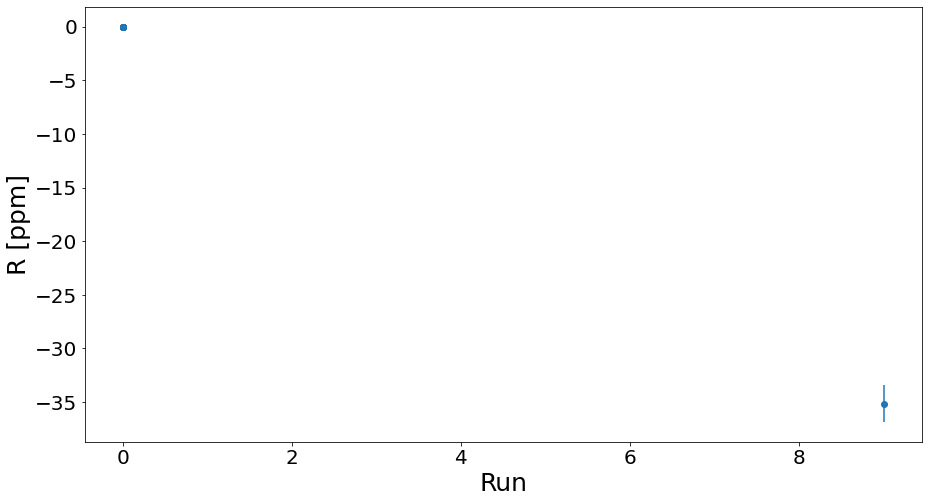

In [17]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run2_caloscan_R.jpg')

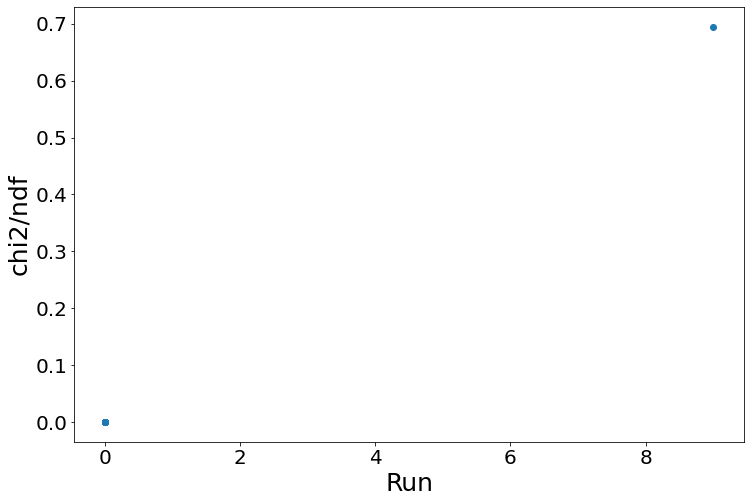

In [18]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, red_chi2, yerr=0, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()

In [19]:
rval

array([ 6.64442721e-316,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  1.83569577e-316,  3.45845952e-323,
        8.17967536e-307,  6.91719994e-310, -3.51626258e+001,
        0.00000000e+000,  2.12199579e-314,  6.65072714e-316,
        1.83580565e-316])

In [20]:
drval

array([6.68232956e-316, 0.00000000e+000, 1.83569340e-316, 0.00000000e+000,
       6.64442959e-316, 2.47032823e-323, 2.44985944e-312, 0.00000000e+000,
       1.70375171e+000, 0.00000000e+000, 2.12199579e-314, 1.83432306e-316,
       2.90667169e-316])

In [21]:
red_chi2

array([6.91728578e-310, 6.91728578e-310,             nan,             nan,
       6.91720070e-310, 9.88131292e-324, 0.00000000e+000,             nan,
       6.94769405e-001, 2.12199566e-314, 6.91720070e-310, 0.00000000e+000,
                   nan])

In [22]:
dataset=["3B","3C","3D","3E","3F","3G","3I","3J","3K","3L","3M","3N","3O"]

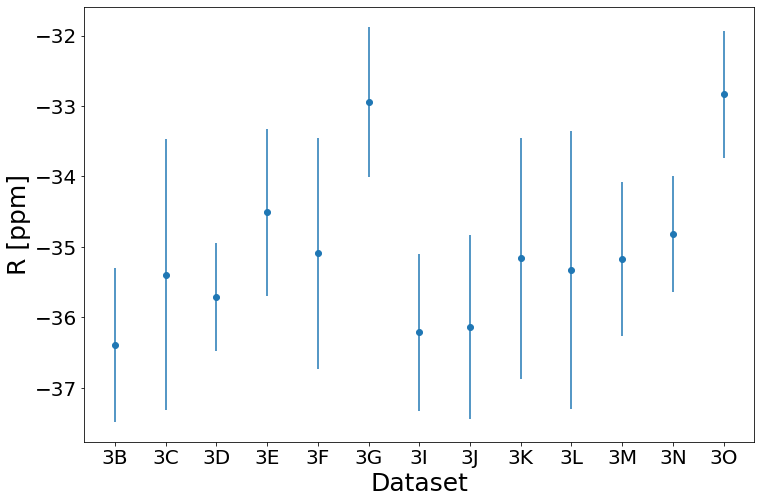

In [23]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(dataset, rval, yerr=drval, fmt="o")
plt.xlabel('Dataset',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()

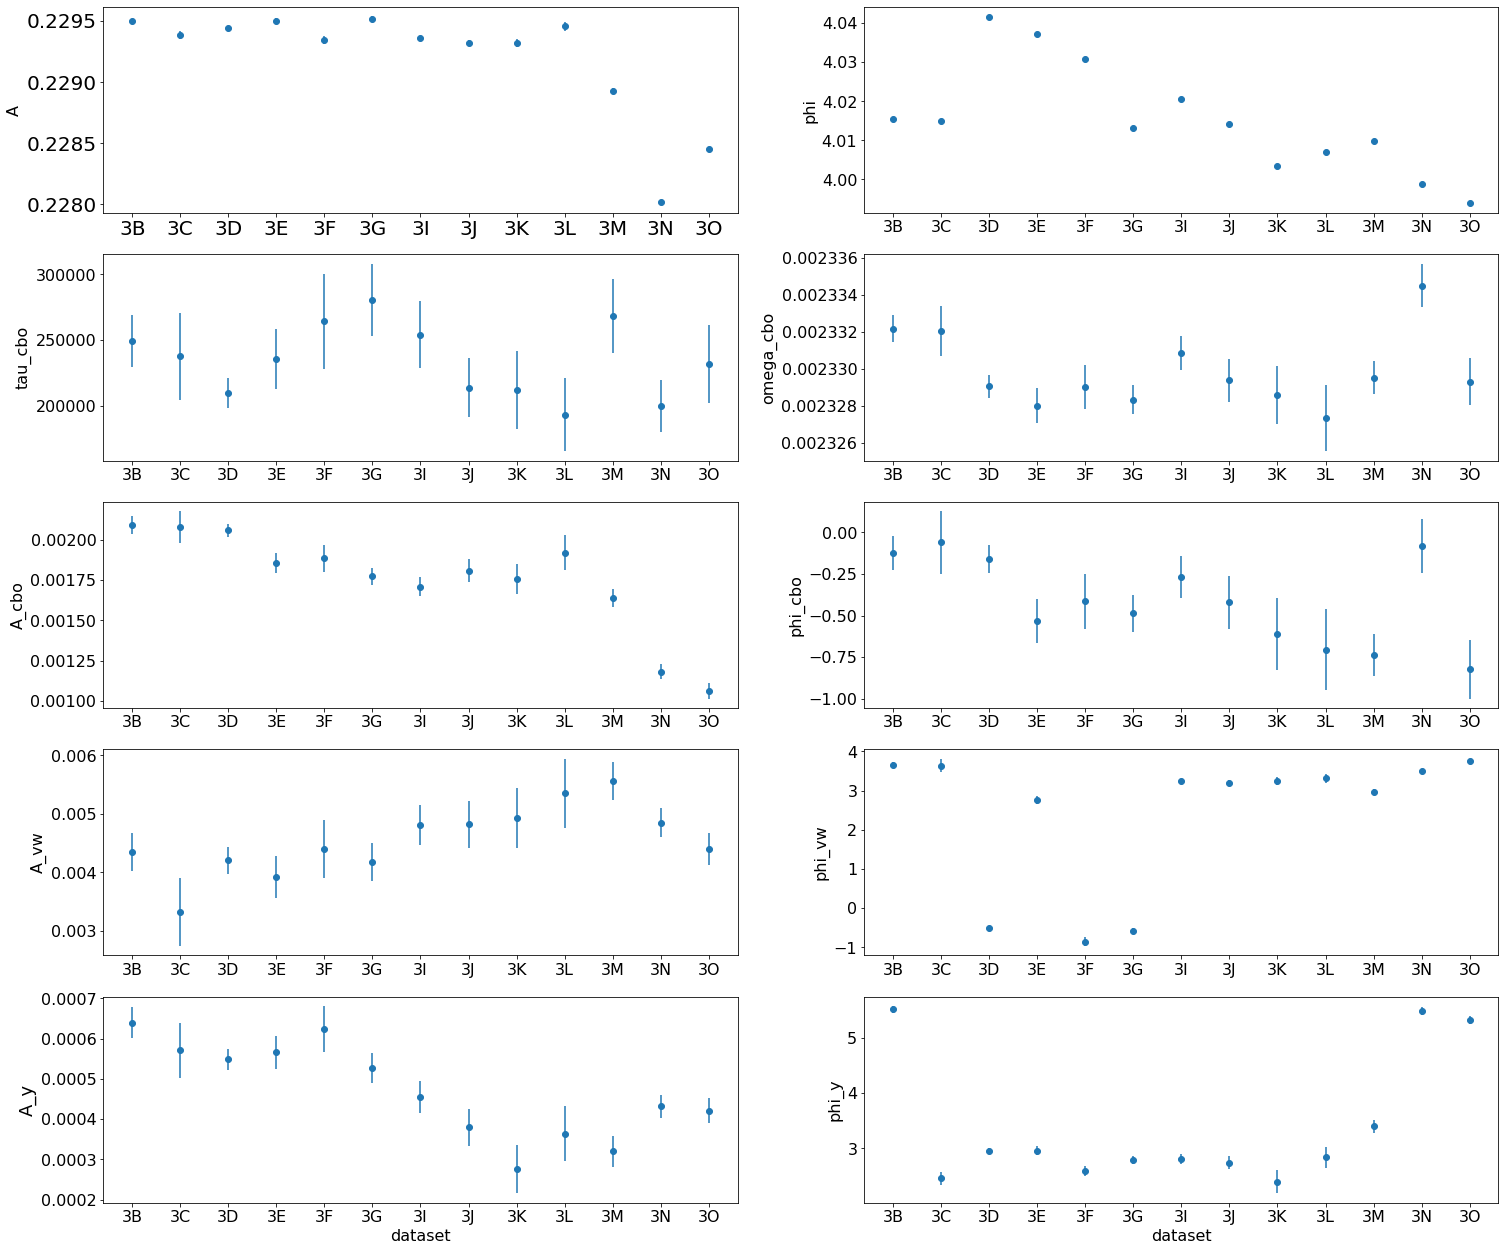

In [24]:
plt.figure(figsize=(25,22))

ax1 = plt.subplot2grid((5,2), (0,0))
# fist line:
#plt.subplot(521)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax2 = plt.subplot2grid((5,2), (0,1))
#plt.subplot(522)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi, yerr=dphi, fmt="o")
#plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax3 = plt.subplot2grid((5,2), (1,0))
#plt.subplot(523)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel('tau_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False
 
ax4 = plt.subplot2grid((5,2), (1,1))
#plt.subplot(524)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, omega_cbo, yerr=domega_cbo, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('omega_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax5 = plt.subplot2grid((5,2), (2,0))
#plt.subplot(525)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, A_cbo, yerr=dA_cbo, fmt="o")
plt.ylabel('A_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax6 = plt.subplot2grid((5,2), (2,1))
#plt.subplot(526)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_cbo, yerr=dphi_cbo, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax7 = plt.subplot2grid((5,2), (3,0))
#plt.subplot(527)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, np.abs(A_vw), yerr=dA_vw, fmt="o")
plt.ylabel('A_vw',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax8 = plt.subplot2grid((5,2), (3,1))
#plt.subplot(528)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_vw, yerr=dphi_vw, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_vw',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax9 = plt.subplot2grid((5,2), (4,0))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, np.abs(A_y), yerr=dA_y, fmt="o")
plt.xlabel('dataset',fontsize=16)
plt.ylabel('A_y',fontsize=18)
plt.rcParams["axes.formatter.useoffset"] = False

ax10 = plt.subplot2grid((5,2), (4,1))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel('dataset',fontsize=16)
plt.ylabel('phi_y',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

In [25]:
asym

array([0.22949471, 0.22938173, 0.22944361, 0.22949891, 0.2293411 ,
       0.22951681, 0.22935524, 0.22932051, 0.22931547, 0.22945505,
       0.22892733, 0.22801807, 0.22844916])

In [26]:
dasym

array([1.97932363e-05, 3.46802618e-05, 1.37931010e-05, 2.15352985e-05,
       2.96725595e-05, 1.93414536e-05, 2.02348579e-05, 2.36384304e-05,
       3.08116134e-05, 3.55708289e-05, 1.96070702e-05, 1.48511672e-05,
       1.63098958e-05])

In [27]:
rval

array([-36.38867578, -35.3924405 , -35.70755401, -34.51026008,
       -35.09149594, -32.94279847, -36.21232665, -36.13623321,
       -35.16262578, -35.32638903, -35.17098666, -34.81782754,
       -32.83677164])

In [28]:
drval

array([1.09521337, 1.91914799, 0.76210298, 1.18945046, 1.63954683,
       1.06806659, 1.11838928, 1.30670116, 1.70375171, 1.96631007,
       1.08722713, 0.82546764, 0.90511975])

In [29]:
phi

array([4.01552234, 4.01483875, 4.04159719, 4.03722856, 4.03087395,
       4.01306095, 4.02053694, 4.01408046, 4.00349947, 4.00692354,
       4.009928  , 3.99879508, 3.99394821])

In [30]:
dphi

array([0.00016643, 0.00029189, 0.00011609, 0.00018123, 0.0002499 ,
       0.00016278, 0.0001704 , 0.00019911, 0.00025956, 0.00029946,
       0.0001654 , 0.00012585, 0.00013796])

In [31]:
A_cbo

array([0.00209401, 0.00208014, 0.0020599 , 0.00185415, 0.00188587,
       0.00177387, 0.00171032, 0.00181013, 0.00175768, 0.00192146,
       0.0016392 , 0.00118122, 0.0010607 ])

In [32]:
dA_cbo

array([5.57656386e-05, 9.95529554e-05, 4.15818181e-05, 6.21474852e-05,
       8.23801414e-05, 5.25418693e-05, 5.67379246e-05, 7.05600388e-05,
       9.27881550e-05, 1.11282291e-04, 5.41918158e-05, 4.59815340e-05,
       4.74664254e-05])

In [33]:
tau_cbo

array([249130.43764967, 237623.54020809, 209687.02292423, 235805.72394095,
       264088.36207272, 280559.1009467 , 254126.11649199, 213662.56821783,
       211787.2915226 , 193066.8319519 , 268250.33043189, 199509.04890698,
       231515.14425571])

In [34]:
dtau_cbo

array([20115.82940269, 33198.13409303, 11214.27495531, 22913.35733424,
       36549.80960794, 27624.19369989, 25878.67123162, 22367.63926125,
       29874.0023299 , 27848.2956519 , 28440.00079464, 19819.54590389,
       29605.30128801])

In [35]:
omega_cbo

array([0.00233217, 0.00233202, 0.00232904, 0.00232799, 0.00232901,
       0.00232832, 0.00233083, 0.00232936, 0.00232857, 0.00232733,
       0.00232951, 0.00233449, 0.0023293 ])

In [36]:
domega_cbo

array([7.40494943e-07, 1.35258102e-06, 6.00942427e-07, 9.48091006e-07,
       1.18263745e-06, 7.85360346e-07, 9.10307582e-07, 1.15110316e-06,
       1.56490243e-06, 1.79090535e-06, 8.89586370e-07, 1.18390490e-06,
       1.27511615e-06])

In [37]:
phi_cbo

array([-0.12492573, -0.06152767, -0.16022158, -0.53077849, -0.4146477 ,
       -0.48644987, -0.27003121, -0.42078853, -0.61118313, -0.70566845,
       -0.73614574, -0.08286451, -0.821537  ])

In [38]:
dphi_cbo

array([0.1036341 , 0.18839589, 0.08244896, 0.13202961, 0.16686922,
       0.11149287, 0.12781269, 0.15817408, 0.21504856, 0.24312086,
       0.12557409, 0.16150745, 0.177233  ])

In [39]:
A_cbo_A

array([ 2.24721985e-04, -1.43171574e-04,  4.49153217e-04,  4.97880187e-04,
        3.86384765e-04, -6.77283857e-04,  9.87536840e-05, -7.24827452e-04,
        5.02809627e-04,  2.38672615e-04, -6.64267557e-04, -4.00236975e-04,
       -3.04476976e-04])

In [40]:
dA_cbo_A

array([0.00016877, 0.00029765, 0.0001237 , 0.0001869 , 0.00024952,
       0.00016042, 0.00017096, 0.00021244, 0.00027682, 0.00032745,
       0.0001652 , 0.00013723, 0.00014312])

In [41]:
phi_cbo_A

array([-0.26649315,  4.39579554,  0.43782426, -0.29257782, -0.5873171 ,
        2.21707681,  0.45577775,  2.18472781, -0.32234888,  0.12526239,
        2.53898435,  2.7909514 ,  1.90455416])

In [42]:
dphi_cbo_A

array([0.75336599, 2.10249763, 0.28768595, 0.39607376, 0.66356863,
       0.26054804, 1.73909799, 0.33201714, 0.58838186, 1.39754635,
       0.27643537, 0.37758374, 0.50084093])

In [43]:
A_cbo_phi

array([-1.52647025e-04, -8.79402852e-05,  9.52886470e-05, -2.90532024e-04,
        2.08915940e-04,  1.72424275e-04, -1.35661907e-04,  2.84576949e-04,
       -4.48104135e-05, -1.00423382e-04,  2.83620407e-04,  8.19372692e-05,
        1.78857258e-04])

In [44]:
dA_cbo_phi

array([0.00016997, 0.00030086, 0.00012628, 0.00018769, 0.00025141,
       0.00016061, 0.00017515, 0.00021618, 0.00027733, 0.00033537,
       0.00016751, 0.00013967, 0.00014377])

In [45]:
phi_cbo_phi

array([  0.05766293,   2.86615753,   0.4748808 ,   2.4965187 ,
        -0.18466159,   1.86740639,   0.75022282,   0.68306663,
         2.50217639, -12.32492509,   0.51511375,   1.39613513,
         1.6504044 ])

In [46]:
dphi_cbo_phi

array([1.1222219 , 3.48674267, 1.31213665, 0.66822121, 1.22253841,
       0.94876056, 1.27678739, 0.76206321, 6.29354049, 3.29192793,
       0.59660089, 1.67964473, 0.83158717])

In [47]:
A_y

array([ 0.00063892, -0.00057023, -0.00054803, -0.00056544, -0.00062331,
       -0.00052606, -0.00045482, -0.00038018, -0.00027515, -0.00036419,
       -0.00031978,  0.00043214,  0.0004207 ])

In [48]:
dA_y

array([3.82464185e-05, 6.70259101e-05, 2.66520753e-05, 4.16069981e-05,
       5.73938857e-05, 3.74011680e-05, 3.90996775e-05, 4.56972134e-05,
       5.95963710e-05, 6.87113138e-05, 3.78113921e-05, 2.87425405e-05,
       3.15794532e-05])

In [49]:
phi_y

array([5.5192879 , 2.45728618, 2.9549493 , 2.96000378, 2.58480946,
       2.78835493, 2.80486457, 2.73629523, 2.39867271, 2.83828557,
       3.40130958, 5.48679112, 5.32702928])

In [50]:
dphi_y

array([0.05968935, 0.11723793, 0.04865277, 0.07361615, 0.09190944,
       0.07105359, 0.08592479, 0.12008147, 0.21599492, 0.18862077,
       0.11858152, 0.06630381, 0.07480441])

In [51]:
A_vw

array([ 0.00434895,  0.00332143, -0.00420813,  0.00392647, -0.00440009,
       -0.00417851,  0.00481018,  0.00481811,  0.00493153,  0.00534938,
        0.0055651 ,  0.00484783,  0.00439966])

In [52]:
dA_vw

array([0.00033078, 0.00057963, 0.00022899, 0.0003578 , 0.00049138,
       0.00032093, 0.00033773, 0.00039466, 0.00051415, 0.00059403,
       0.00032628, 0.00024885, 0.00027362])

In [53]:
phi_vw

array([ 3.66391801,  3.63832797, -0.50501266,  2.76110937, -0.85348861,
       -0.57936094,  3.23745448,  3.19549211,  3.23329029,  3.31209247,
        2.97240539,  3.50981959,  3.75542172])

In [54]:
dphi_vw

array([0.07517301, 0.17249849, 0.05488338, 0.09166954, 0.11307208,
       0.07755666, 0.06982311, 0.08154246, 0.1036956 , 0.11026362,
       0.05866817, 0.05080714, 0.06144435])

In [55]:
A_2cbo

array([-1.62657370e-04, -1.40640821e-04, -1.76806956e-04, -1.03211105e-04,
       -5.59524675e-05, -8.24588402e-05, -1.35190877e-04, -1.83172934e-04,
       -9.74652188e-05, -1.53561157e-04,  8.93288932e-05, -3.35814750e-05,
       -2.22604496e-05])

In [56]:
dA_2cbo

array([3.62597646e-05, 6.48322851e-05, 2.77107311e-05, 4.03249657e-05,
       5.23294292e-05, 3.32624748e-05, 3.67712611e-05, 4.73153732e-05,
       6.09930507e-05, 7.46598947e-05, 3.43504438e-05, 3.02036778e-05,
       3.06458068e-05])

In [57]:
phi_2cbo

array([ 0.55461375,  0.58252179,  0.39966782, -0.61253464, -0.01728116,
        0.14638824,  1.05607867,  0.23552605, -0.38658559, -0.14027374,
        1.57678475,  1.50041249, -0.86803153])

In [58]:
dphi_2cbo

array([0.30227458, 0.59204737, 0.2261728 , 0.46922926, 0.98995791,
       0.45988359, 0.37030006, 0.40491368, 0.7560012 , 0.68409603,
       0.45808459, 0.95540337, 1.41812224])

In [59]:
A_cbot

array([ 0.01189425,  0.01537969,  0.00791575, -0.00333831,  0.00287304,
       -0.00407004,  0.00954287,  0.00438297, -0.00323354, -0.00505984,
        0.00525712,  0.02147682, -0.01089759])

In [60]:
dA_cbot

array([0.00464422, 0.00840891, 0.00363742, 0.00590992, 0.00755173,
       0.00507571, 0.0057509 , 0.00698204, 0.00950967, 0.010642  ,
       0.00567582, 0.00706548, 0.00791926])

In [61]:
red_chi2

array([0.89069233, 0.87551503, 0.94324421, 0.94422465, 0.89222291,
       0.87003365, 0.90504897, 0.90405931, 0.6947694 , 0.92584923,
       0.89238171, 1.03030141, 0.94198011])

In [62]:
(fit_range-len(pars2))*red_chi2

array([1618.38795578, 1590.81081427, 1713.87472935, 1715.65619399,
       1621.16903032, 1580.85113863, 1644.47397155, 1642.67576262,
       1262.39600853, 1682.26805846, 1621.45757537, 1872.05765779,
       1711.57786696])

In [63]:
fit_range-len(pars2)

1817